In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

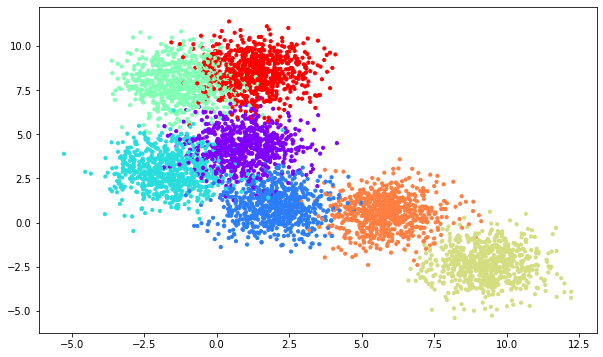

In [ ]:
X, y = make_blobs(n_samples=5000, centers=7,random_state=0, cluster_std=1.0)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow');
plt.show()

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_train_pred = classifier.predict(X_train)
dt_test_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, dt_train_pred))
print(accuracy_score(y_test, dt_test_pred))

0.7991044776119403
0.7957575757575758


**random forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print(accuracy_score(y_train, rf_train_pred))
print(accuracy_score(y_test, rf_test_pred))

0.9280597014925374
0.9139393939393939


**Bagging and Boosting**

In [ ]:
bg = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=100)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,

In [ ]:
print(bg.score(X_train, y_train))
print(bg.score(X_test,y_test))

0.9211940298507463
0.9236363636363636


**Boosting**

In [ ]:
ad = AdaBoostClassifier(RandomForestClassifier(n_estimators=25, max_depth=5), n_estimators=100, learning_rate=0.001)
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [ ]:
print(ad.score(X_train, y_train))
ad.score(X_test,y_test)

0.9304477611940298


0.9163636363636364

In [ ]:
ab_pred = ad.predict(X_test)

In [ ]:
accuracy_score(y_test, ab_pred)

0.9163636363636364

In [ ]:
train_pred = ad.predict(X_train)
accuracy_score(y_train, train_pred)

0.9304477611940298